In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Processing ML

In [ ]:
#importing required packages for this module
import pandas as pd

In [ ]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv("data/online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6557033,http://u1047531.cp.regruhosting.ru/acces-inges...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:43+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
1,6557032,http://hoysalacreations.com/wp-content/plugins...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:37+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
2,6557011,http://www.accsystemprblemhelp.site/checkpoint...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:54:31+00:00,yes,2020-05-09T21:55:38+00:00,yes,Facebook
3,6557010,http://www.accsystemprblemhelp.site/login_atte...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:53:48+00:00,yes,2020-05-09T21:54:34+00:00,yes,Facebook
4,6557009,https://firebasestorage.googleapis.com/v0/b/so...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:49:27+00:00,yes,2020-05-09T21:51:24+00:00,yes,Microsoft


In [ ]:
data0.shape

(14858, 8)

In [ ]:
#Collecting 5,000 Phishing URLs randomly
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6485787,https://eevee.tv/Bootstrap/assets/css/acces,http://www.phishtank.com/phish_detail.php?phis...,2020-04-04T03:01:00+00:00,yes,2020-04-04T03:03:56+00:00,yes,Other
1,6422543,https://appleid.apple.com-sa.pm/appleid/?,http://www.phishtank.com/phish_detail.php?phis...,2020-02-27T17:01:01+00:00,yes,2020-03-17T01:50:51+00:00,yes,Other
2,6543602,https://grandcup.xyz/,http://www.phishtank.com/phish_detail.php?phis...,2020-05-02T23:07:29+00:00,yes,2020-05-02T23:09:03+00:00,yes,Steam
3,6528783,https://villa-azzurro.com/onedrive/,http://www.phishtank.com/phish_detail.php?phis...,2020-04-25T20:54:02+00:00,yes,2020-04-25T21:46:55+00:00,yes,Other
4,6498136,http://mygpstrip.net/ii/u.php,http://www.phishtank.com/phish_detail.php?phis...,2020-04-10T15:01:56+00:00,yes,2020-04-10T16:01:37+00:00,yes,Other


In [ ]:
phishurl.shape

(5000, 8)

In [ ]:
#Loading legitimate files 
data1 = pd.read_csv("data/Benign_list_big_final.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
#Collecting 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
legiurl.shape

(5000, 1)

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


In [ ]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [ ]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [ ]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

In [ ]:
# 12.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [ ]:
# 14.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

In [ ]:
# importing required packages for this section
import requests

In [ ]:
# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [ ]:
# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [ ]:
# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [ ]:
# 18.Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [ ]:
#Function to extract features
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features

In [ ]:
legiurl.shape

(5000, 1)

In [ ]:
#Extracting the feautres & storing them in a list
legi_features = []
label = 0

for i in range(0, 5000):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
# Storing the extracted legitimate URLs fatures to csv file
legitimate.to_csv('data/legitimate.csv', index= False)

In [ ]:
phishurl.shape

(5000, 8)

In [ ]:
#Extracting the feautres & storing them in a list
phish_features = []
label = 1
for i in range(0, 5000):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Tiny_URL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,eevee.tv,0,0,0,4,0,0,0,0,0,1,0,0,0,0,1,0,1
1,appleid.apple.com-sa.pm,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1
2,grandcup.xyz,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1
3,villa-azzurro.com,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1
4,mygpstrip.net,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
# Storing the extracted legitimate URLs fatures to csv file
phishing.to_csv('data/phishing.csv', index= False)

In [ ]:
#Concatenating the dataframes into one 
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9999,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,0,1,1,1,0,0,1,0,1


In [ ]:
urldata.shape

(10000, 18)

In [ ]:
# Storing the data in CSV file
urldata.to_csv('data/urldata.csv', index=False)

# Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from imblearn.metrics import specificity_score

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
def load_data():
    combined_data = pd.read_csv("data/urldata.csv")

    # Drop 'Web Traffic' column
    combined_data = combined_data.drop('Web_Traffic', axis=1)

    # Split features and target y

    x = combined_data.drop(['Domain', 'Label'], axis=1)
    y = combined_data['Label']

    return x, y

In [5]:
x, y = load_data()

<AxesSubplot:xlabel='Label', ylabel='count'>

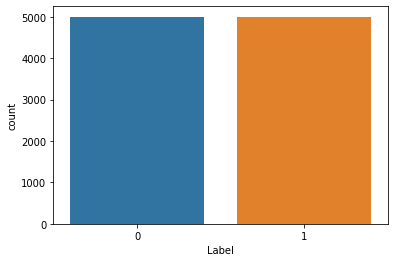

In [6]:
sns.countplot(x=y)

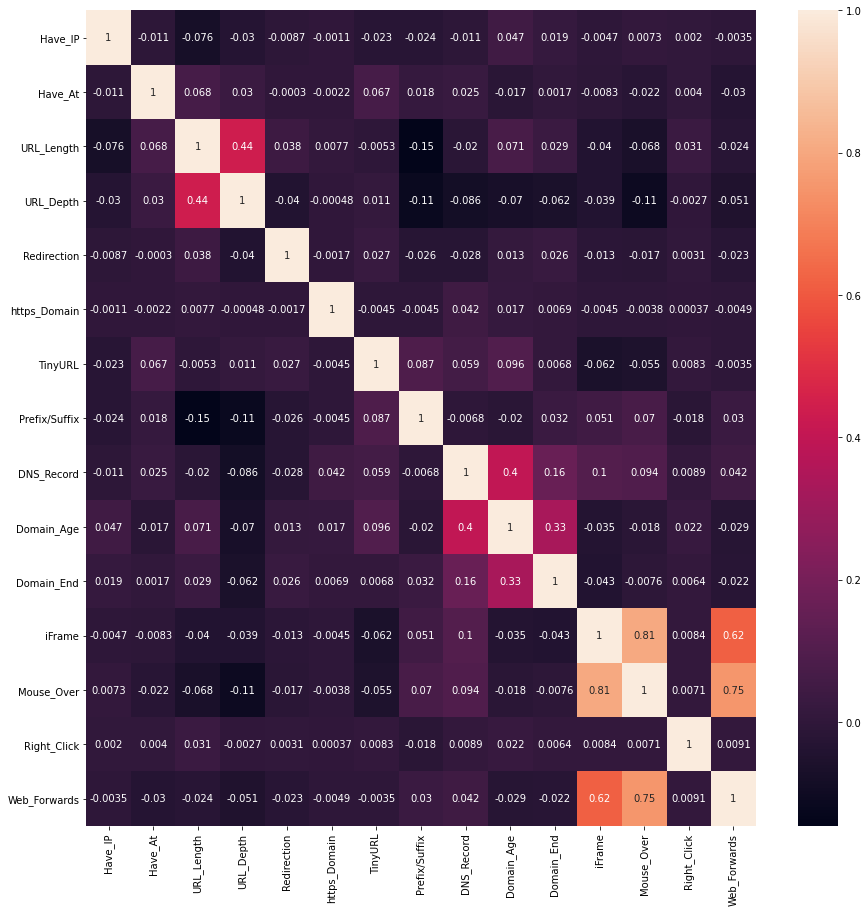

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
specificity = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))
    specificity.append(round(e,3))


# SVC

In [17]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(x_train, y_train)
#predicting the target value from the model for the samples
y_train_svc = svc.predict(x_train)
y_test_svc = svc.predict(x_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))
print()

specificity_score_train_svc =  specificity_score(y_train,y_train_svc)
specificity_score_test_svc = specificity_score(y_test,y_test_svc)
print("Support Vector Machine : specificity on training Data: {:.3f}".format(specificity_score_train_svc))
print("Support Vector Machine : specificity on test Data: {:.3f}".format(specificity_score_test_svc))


#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc,specificity_score_test_svc)

Support Vector Machine : Accuracy on training Data: 0.821
Support Vector Machine : Accuracy on test Data: 0.817

Support Vector Machine : f1_score on training Data: 0.792
Support Vector Machine : f1_score on test Data: 0.780

Support Vector Machine : Recall on training Data: 0.680
Support Vector Machine : Recall on test Data: 0.655

Support Vector Machine : precision on training Data: 0.949
Support Vector Machine : precision on test Data: 0.963

Support Vector Machine : specificity on training Data: 0.963
Support Vector Machine : specificity on test Data: 0.975


# Random Forest

In [18]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(random_state=5)

# fit the model 
forest.fit(x_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(x_train)
y_test_forest = forest.predict(x_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))
print()

specificity_score_train_forest =  specificity_score(y_train,y_train_forest)
specificity_score_test_forest = specificity_score(y_test,y_test_forest)
print("Random Forest : specificity on training Data: {:.3f}".format(specificity_score_train_forest))
print("Random Forest : specificity on test Data: {:.3f}".format(specificity_score_test_forest))

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest,specificity_score_test_forest)

Random Forest : Accuracy on training Data: 0.856
Random Forest : Accuracy on test Data: 0.850

Random Forest : f1_score on training Data: 0.844
Random Forest : f1_score on test Data: 0.831

Random Forest : Recall on training Data: 0.777
Random Forest : Recall on test Data: 0.745

Random Forest : precision on training Data: 0.923
Random Forest : precision on test Data: 0.939

Random Forest : specificity on training Data: 0.935
Random Forest : specificity on test Data: 0.953


# XGBoost

In [19]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(x_train,y_train)

#predicting the target value from the model for the samples
y_train_gbc = xgb.predict(x_train)
y_test_gbc = xgb.predict(x_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("XGBoost : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("XGBoost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("XGBoost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("XGBoost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("XGBoost : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("XGBoost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("XGBoost : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

specificity_score_train_gbc =  specificity_score(y_train,y_train_gbc)
specificity_score_test_gbc = specificity_score(y_test,y_test_gbc)
print("XGBoost : specificity on training Data: {:.3f}".format(specificity_score_train_gbc))
print("XGBoost : specificity on test Data: {:.3f}".format(specificity_score_test_gbc))

#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc,specificity_score_test_gbc)

XGBoost : Accuracy on training Data: 0.854
XGBoost : Accuracy on test Data: 0.847

XGBoost : f1_score on training Data: 0.842
XGBoost : f1_score on test Data: 0.826

XGBoost : Recall on training Data: 0.775
XGBoost : Recall on test Data: 0.740

XGBoost : precision on training Data: 0.921
XGBoost : precision on test Data: 0.936

XGBoost : specificity on training Data: 0.933
XGBoost : specificity on test Data: 0.951


# Stacking CLassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier


RF = RandomForestClassifier(random_state=5)

estimators = [('rf', LGBMClassifier()),('et', RF)]

clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())


clf.fit(x_train,y_train)

#predicting the target value from the model for the samples
y_train_stac = clf.predict(x_train)
y_test_stac = clf.predict(x_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_stac = round(metrics.accuracy_score(y_train,y_train_stac))
acc_test_stac = round(metrics.accuracy_score(y_train,y_train_stac))
print("Stacking Classifier : Accuracy on training Data: {:.3f}".format(acc_train_stac))
print("Stacking Classifier : Accuracy on test Data: {:.3f}".format(acc_test_stac))
print()

f1_score_train_stac = metrics.f1_score(y_train,y_train_stac)
f1_score_test_stac = metrics.f1_score(y_test,y_test_stac)
print("Stacking Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_stac))
print("Stacking Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_stac))
print()

recall_score_train_stac = metrics.recall_score(y_train,y_train_stac)
recall_score_test_stac =  metrics.recall_score(y_test,y_test_stac)
print("Stacking Classifier : Recall on training Data: {:.3f}".format(recall_score_train_stac))
print("Stacking Classifier : Recall on test Data: {:.3f}".format(recall_score_test_stac))
print()

precision_score_train_stac = metrics.precision_score(y_train,y_train_stac)
precision_score_test_stac = metrics.precision_score(y_test,y_test_stac)
print("Stacking Classifier : precision on training Data: {:.3f}".format(precision_score_train_stac))
print("Stacking Classifier : precision on test Data: {:.3f}".format(precision_score_test_stac))
print()

specificity_score_train_stac =  specificity_score(y_train,y_train_stac)
specificity_score_test_stac = specificity_score(y_test,y_test_stac)
print("Stacking Classifier : specificity on training Data: {:.3f}".format(specificity_score_train_stac))
print("Stacking Classifier : specificity on test Data: {:.3f}".format(specificity_score_test_stac))

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Stacking Classifier',round(acc_test_stac),f1_score_test_stac,
             recall_score_train_stac,precision_score_train_stac,specificity_score_test_stac)


Stacking Classifier : Accuracy on training Data: 1.000
Stacking Classifier : Accuracy on test Data: 1.000

Stacking Classifier : f1_score on training Data: 0.837
Stacking Classifier : f1_score on test Data: 0.824

Stacking Classifier : Recall on training Data: 0.754
Stacking Classifier : Recall on test Data: 0.724

Stacking Classifier : precision on training Data: 0.941
Stacking Classifier : precision on test Data: 0.956

Stacking Classifier : specificity on training Data: 0.953
Stacking Classifier : specificity on test Data: 0.967


# Comparison

In [22]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'Specificity': specificity
                      })

In [23]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision,Specificity
0,Support Vector Machine,0.817,0.780,0.680,0.949,0.975
1,Random Forest,0.850,0.831,0.777,0.923,0.953
2,XGBoost,0.846,0.826,0.775,0.921,0.951
3,Stacking Classifier,1.000,0.824,0.754,0.941,0.967


In [24]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

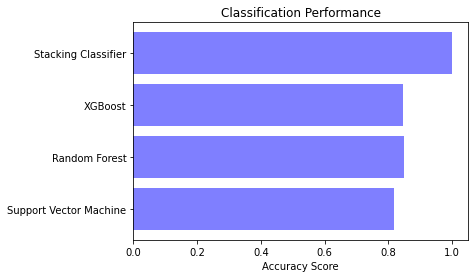

In [25]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

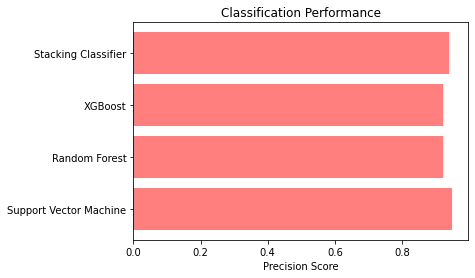

In [26]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

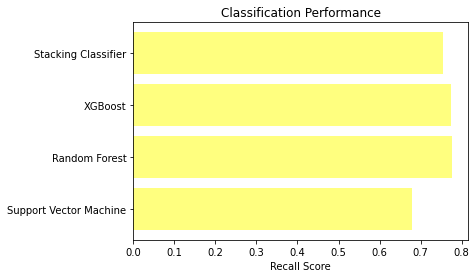

In [27]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

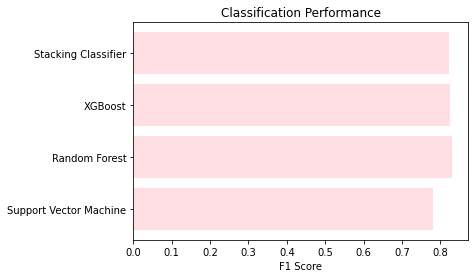

In [28]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1_score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

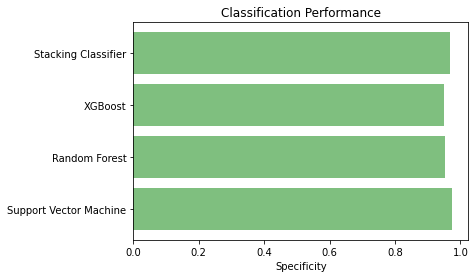

In [29]:
plt2.barh(y_pos, specificity, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()